# Lecture 11의 데모

### Lecture 11의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec17.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec18.ipynb


In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Alameda County Jury Panels**

참고자료: https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf (페이지 3)

https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html#composition-of-panels-in-alameda-county

In [3]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


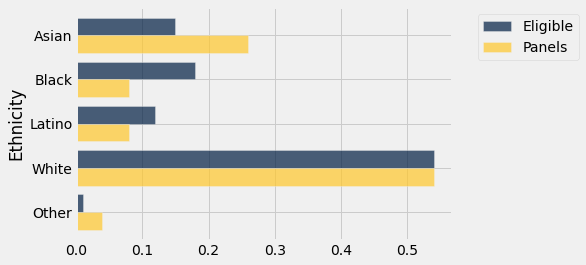

In [4]:
jury.barh('Ethnicity')

In [5]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model=make_array(0.15, 0.18, 0.12, 0.54, 0.01)
model

array([ 0.15,  0.18,  0.12,  0.54,  0.01])

In [7]:
# Let's simulate a random draw of 1453 jurors from this distribution
simulated = sample_proportions(1453, model)

simulated

array([ 0.16586373,  0.16311081,  0.12388162,  0.54163799,  0.00550585])

In [8]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated


Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.165864
Black,0.18,0.08,0.163111
Latino,0.12,0.08,0.123882
White,0.54,0.54,0.541638
Other,0.01,0.04,0.00550585


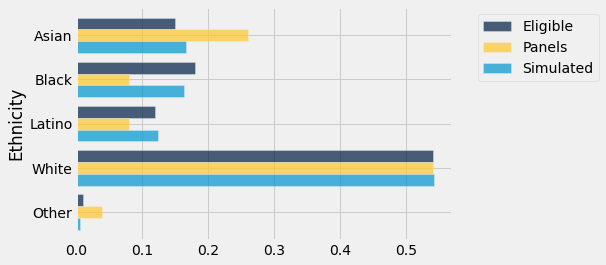

In [9]:
jury_with_simulated.barh('Ethnicity')

## **Distance Between Distributions**

In [10]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference',diffs)
jury_with_difference


Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## **Total Variation Distance**

In [ ]:
jury_with_simulated

In [ ]:
def tvd(dist1, dist2):
  return sum(abs(dist1- dist2))/2

In [ ]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
observed_tvd=tvd(jury_simulated('Panels'),jury.column(''))
 observed_tvd

In [ ]:
# The TVD of a model simluation from its expected values


In [ ]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)



## **The GSI's Defense**

In [ ]:
scores = Table.read_table('scores_by_section.csv')
scores

In [ ]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class


In [ ]:
# Simulate 50,000 copies of the test statistic


## **Our Decision**

In [ ]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic


### Approach 1

In [ ]:
# (1) Calculate the p-value: simulation area beyond observed value
# (2) See if this is less than 5%


### Approach 2

In [ ]:
# (1) Find simulated value corresponding to 5% of 50,000 = 2500


In [ ]:
# (2) See if this value is greater than observed value


### Approach 3

In [ ]:
# Visual Representation
